In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Import model training packages
from sklearn.model_selection import train_test_split

# Making pipeline import
from sklearn.pipeline import make_pipeline

# Load the dataset
dataset_path = '../data/original_data/dataset.csv'
df = pd.read_csv(dataset_path)

# Removing Empty Column
df.drop(columns=['id','Unnamed: 32'],inplace=True)

# Move diagnosis to be last column
df['diagnosis'] = df.pop('diagnosis')

# Display the first few rows of the dataset
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, PassiveAggressiveClassifier, Perceptron, RidgeClassifier, RidgeClassifierCV, SGDClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.metrics import f1_score, roc_auc_score, recall_score, precision_score, accuracy_score

# Prepare X_train, X_test, y_train, y_test
X = df.drop(columns='diagnosis')
y = df['diagnosis']

# Create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# For Gausian Classifier
kernel = 1.0 * RBF(1.0)

# (name, interpretability, model)
models = [
    ('LogisticRegression', 'Best', LogisticRegression(random_state=42, max_iter=1000)),
    ('LogisticRegressionCV', 'Best', LogisticRegressionCV(cv=50, random_state=42, max_iter=1000)),
    ('PassiveAggressiveClassifier', 'Worst', PassiveAggressiveClassifier(random_state=42)),
    ('Perceptron', 'Worst', Perceptron(random_state=42)),
    ('RidgeClassifier', 'Best', RidgeClassifier(random_state=42)),
    ('RidgeClassifierCV', 'Best', RidgeClassifierCV(cv=50)),
    ('SGDClassifier', 'Worst', SGDClassifier(random_state=42)),
    ('AdaBoostClassifier', 'High', AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=42)),
    ('BaggingClassifier', 'Medium', BaggingClassifier(n_estimators=10, random_state=42)),
    ('ExtraTreesClassifier', 'Medium', ExtraTreesClassifier(n_estimators=100, random_state=42)),
    ('GradientBoostingClassifier', 'Medium', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)),
    ('RandomForestClassifier', 'Medium', RandomForestClassifier(max_depth=2, random_state=42)),
    ('HistGradientBoostingClassifier', 'Medium', HistGradientBoostingClassifier()),
    ('GaussianProcessClassifier', 'Low', GaussianProcessClassifier(kernel=1.0 * RBF(1.0), random_state=42)),
    ('BernoulliNB', 'Best', BernoulliNB()),
    ('GaussianNB', 'Best', GaussianNB()),
    ('KNeighborsClassifier', 'Low', KNeighborsClassifier()),
    ('RadiusNeighborsClassifier', 'Low', RadiusNeighborsClassifier(radius=8.0)),
    ('NearestCentroid', 'Best', NearestCentroid()),
    ('MLPClassifier', 'Low', MLPClassifier(max_iter=1000, random_state=42)),
    ('LinearSVC', 'Worst', LinearSVC(dual=True)),
    ('NuSVC', 'Low', NuSVC(random_state=42)),
    ('SVC', 'Low', SVC(random_state=42)),
    ('DecisionTreeClassifier', 'Best', DecisionTreeClassifier(random_state=42)),
    ('ExtraTreeClassifier', 'Best', ExtraTreeClassifier(random_state=42))
]


# Make pipeline
def run_pipelines(X_train, X_test, y_train, y_test, models) -> pd.DataFrame:
    model_results = []

    # Specify which label is considered 'positive' for binary classification metrics
    pos_label = 'M'  # Assuming 'M' is the label of interest (e.g., Malignant in a cancer diagnosis context)

    for name, interpretability, model in models:
        pipe = make_pipeline(StandardScaler(), model)
        pipe.fit(X_train, y_train)

        y_pred = pipe.predict(X_test)
        y_pred_train = pipe.predict(X_train)

        if hasattr(model, "predict_proba"):
            y_prob = pipe.predict_proba(X_test)[:, 1]  # Assuming the 'positive' class is at index 1
            auc = roc_auc_score(y_test, y_prob)
        else:
            auc = "N/A"

        scores = {
            'Model': name,
            'Interpretability': interpretability,
            'F1 Score': f1_score(y_test, y_pred, pos_label=pos_label),
            'ROC AUC': auc,
            'Recall': recall_score(y_test, y_pred, pos_label=pos_label),
            'Precision': precision_score(y_test, y_pred, pos_label=pos_label),
            'Accuracy (Testing)': accuracy_score(y_test, y_pred),
            'Accuracy (Training)': accuracy_score(y_train, y_pred_train)
        }

        model_results.append(scores)
        # print(f"{scores}")

    return pd.DataFrame(model_results)

df_models = run_pipelines(X_train, X_test, y_train, y_test, models)
df_models

,Model,Interpretability,F1 Score,ROC AUC,Recall,Precision,Accuracy (Testing),Accuracy (Training)
0,LogisticRegression,Best,0.964706,0.99738,0.953488,0.976190,0.973684,0.986813
1,LogisticRegressionCV,Best,0.976190,0.99738,0.953488,1.000000,0.982456,0.986813
2,PassiveAggressiveClassifier,Worst,0.976744,N/A,0.976744,0.976744,0.982456,0.984615
3,Perceptron,Worst,0.965517,N/A,0.976744,0.954545,0.973684,0.975824
4,RidgeClassifier,Best,0.939759,N/A,0.906977,0.975000,0.956140,0.967033
5,RidgeClassifierCV,Best,0.939759,N/A,0.906977,0.975000,0.956140,0.964835
6,SGDClassifier,Worst,0.954545,N/A,0.976744,0.933333,0.964912,0.975824
7,AdaBoostClassifier,High,0.964706,0.994432,0.953488,0.976190,0.973684,1.000000
8,BaggingClassifier,Medium,0.941176,0.985097,0.930233,0.952381,0.956140,0.993407
9,ExtraTreesClassifier,Medium,0.952381,0.99869,0.930233,0.975610,0.964912,1.000000


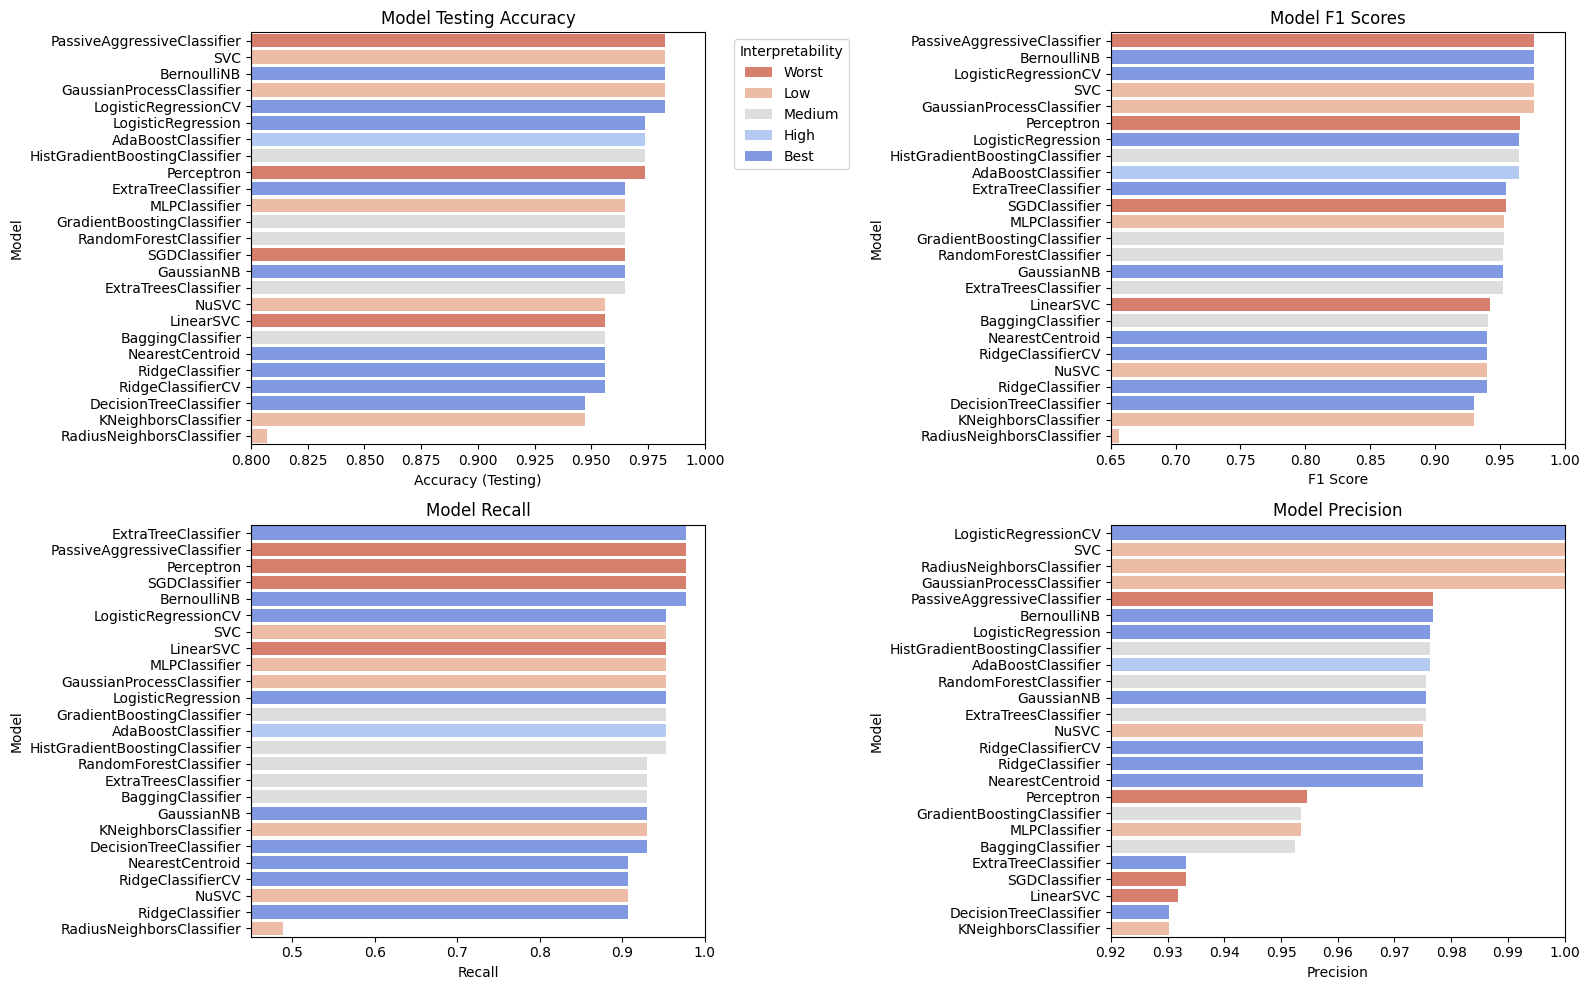

In [3]:
# Interpretability Ratings Scale
# Best: Models that are inherently interpretable, offering direct insights into how input features influence the output.
# High: Simpler ensemble methods where you can still derive feature importance, offering a good balance between interpretability and complexity.
# Medium: More complex ensemble methods that provide feature importance scores but with less transparency due to the aggregation of multiple models.
# Low: Models that have complex decision boundaries or lack straightforward interpretability, requiring more effort to interpret.
# Worst: The least interpretable models, often due to their complexity or the nature of their decision-making process, providing little to no straightforward insight into how decisions are made.

# Convert 'interpretability' into an ordered categorical variable
interpretability_order = ['Worst', 'Low', 'Medium', 'High', 'Best']
df_models['Interpretability'] = pd.Categorical(df_models['Interpretability'], categories=interpretability_order, ordered=True)

# Define the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

# First subplot for Accuracy (Testing)
sns.barplot(data=df_models.sort_values(by='Accuracy (Testing)',ascending=False), x='Accuracy (Testing)', y='Model', palette='coolwarm_r', hue='Interpretability', ax=axes[0,0])
axes[0,0].set_xlim([0.8, 1])
axes[0,0].set_title('Model Testing Accuracy')
axes[0,0].legend(title='Interpretability', bbox_to_anchor=(1.05, 1), loc='upper left')

# Second subplot for F1 Score
sns.barplot(data=df_models.sort_values(by='F1 Score',ascending=False), x='F1 Score', y='Model', palette='coolwarm_r', hue='Interpretability', ax=axes[0,1])
axes[0,1].set_xlim([0.65, 1])
axes[0,1].set_title('Model F1 Scores')
axes[0,1].legend().set_visible(False)  # Hide the legend for the second subplot to avoid repetition

# First subplot for Accuracy (Testing)
sns.barplot(data=df_models.sort_values(by='Recall',ascending=False), x='Recall', y='Model', palette='coolwarm_r', hue='Interpretability', ax=axes[1,0])
axes[1,0].set_xlim([0.45, 1])
axes[1,0].set_title('Model Recall')
axes[1,0].legend(title='Interpretability', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,0].legend().set_visible(False)  # Hide the legend for the second subplot to avoid repetition

# Second subplot for F1 Score
sns.barplot(data=df_models.sort_values(by='Precision',ascending=False), x='Precision', y='Model', palette='coolwarm_r', hue='Interpretability', ax=axes[1,1])
axes[1,1].set_xlim([0.92, 1])
axes[1,1].set_title('Model Precision')
axes[1,1].legend().set_visible(False)  # Hide the legend for the second subplot to avoid repetition

# Adjust layout for better spacing and display the plot
plt.tight_layout()
plt.show()

## High Interpretable Models with Test Accuracy > 0.95
### **BernoulliNB (Bernoulli Naive Bayes)**

Interpretability: **High**
- Probabilistic Model: Based on Bayes' theorem with the assumption that all features are independent binary variables. This simplicity makes it easy to understand the impact of each feature's presence or absence on the predicted outcome.
- Transparent Decision-Making: Offers clear probabilistic explanations for its predictions, making it straightforward to interpret how each feature contributes to the final decision.
- Ideal for Binary Features: Especially interpretable for datasets with binary features, such as text classification using word presence/absence.

### **Logistic Regression**

Interpretability: **High**
- Linear Relationship: Models the log-odds of the dependent variable linearly as a function of the input features, allowing for easy interpretation of how feature changes impact the outcome.
- Coefficients as Odds Ratios: The coefficients can be directly related to the odds ratios, providing clear insights into the influence of each feature.
- Probability Estimates: Gives the probability of the target class, adding an intuitive aspect to model predictions.

### **Logistic Regression CV (Logistic Regression with Cross-Validation)**

Interpretability: **High**
- All benefits of Logistic Regression: Maintains the interpretability of standard logistic regression by providing coefficients that explain the influence of each feature.
- Robust Parameter Selection: Uses cross-validation to select the regularization strength, which helps in preventing overfitting and ensures the model is generalizable without compromising interpretability.

### **GaussianNB (Gaussian Naive Bayes)**

Interpretability: **High**
- Assumes Normal Distribution: Ideal for continuous or normally distributed data, making assumptions about the data distribution that contribute to its interpretability.
- Probabilistic Approach: Like other Naive Bayes models, offers clear probabilistic reasoning for its decisions, with each feature contributing independently to the likelihood of each class.
- Simplicity: The model's simplicity, with the assumption of feature independence and normal distribution, makes its decision process easy to understand.

### **ExtraTreeClassifier (Extremely Randomized Trees)**

Interpretability: **Medium**
- Decision Tree Ensemble: Builds on the interpretability of individual decision trees by using an ensemble of many, which complicates direct interpretation.
- Feature Importance: Provides insights into which features are most important for predictions, which adds a level of interpretability.
- Increased Randomness: Introduces additional randomness in the selection of features and splits, compared to other tree-based models like Random Forests, which can make the model's reasoning less transparent.
- Rule-Based: Each tree in the ensemble makes decisions based on simple, interpretable rules, but the aggregation over many trees dilutes this clarity.

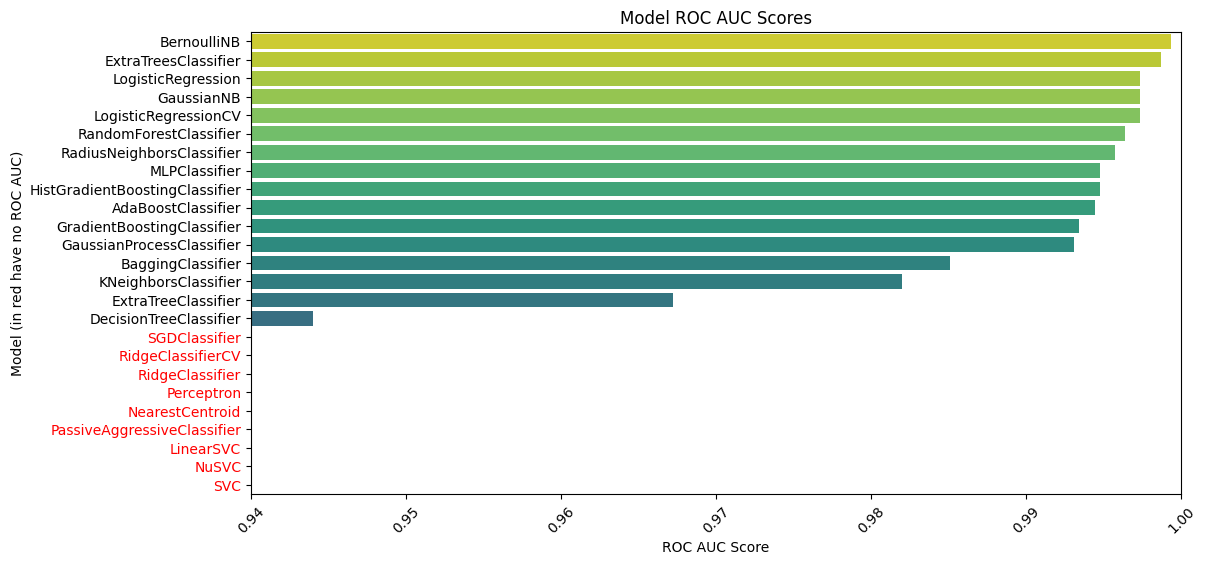

In [4]:
# Create a copy of df_models to preserve the original data
df_models_roc = df_models.copy()

# Replace 'N/A' values in 'ROC AUC' column with 0
df_models_roc['ROC AUC'] = pd.to_numeric(df_models_roc['ROC AUC'], errors='coerce').fillna(0)

# Convert 'ROC AUC' column to numeric now that all values are valid numbers
df_models_roc['ROC AUC'] = pd.to_numeric(df_models_roc['ROC AUC'])

# Sort the DataFrame for the plot
df_sorted = df_models_roc.sort_values(by='ROC AUC', ascending=False)

# Plot using seaborn
plt.figure(figsize=(12, 6))

# Create barplot
ax = sns.barplot(data=df_sorted, y='Model', x='ROC AUC',palette='viridis_r',legend=False,hue='Model')
plt.xlim(0.94, 1)

# Set labels
plt.title('Model ROC AUC Scores')
plt.ylabel('Model (in red have no ROC AUC)')
plt.xlabel('ROC AUC Score')

# Rotate x-axis labels
plt.xticks(rotation=45)  # Rotate labels 45 degrees

# Change the color of the label to red where 'ROC AUC' is 0
for i, model in enumerate(df_sorted['Model']):
    if df_sorted[df_sorted['Model'] == model]['ROC AUC'].values[0] == 0:
        ax.get_yticklabels()[i].set_color('red')

plt.show()

In [5]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Models to evaluate
models = [
    ('BernoulliNB', BernoulliNB()),
    ('LogisticRegression', LogisticRegression(random_state=42, max_iter=1000)),
    ('GaussianNB', GaussianNB()),
]

# Range of splits
splits_range = range(2, 21)

# List to hold the scores
all_scores = []

# Loop over each model
for model_name, model in models:
    # Loop over each number of splits
    for n_splits in splits_range:
        # Define the KFold cross-validator
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

        # Calculate cross-validated scores
        cv_scores = cross_val_score(
            Pipeline([
                ('scaler', StandardScaler()), ('classifier', model)
            ]), 
            X, 
            y, 
            cv=kf, 
            scoring='accuracy'
        )

        # Store the mean of the scores for the current n_splits configuration
        all_scores.append({
            'n_split': n_splits,
            'model': model_name,
            'score_accuracy': cv_scores.mean()
        })

# Convert the list of scores to a DataFrame
df_scores = pd.DataFrame(all_scores)

# Use pivot_table to reshape the DataFrame
df_pivoted = df_scores.pivot_table(index='n_split', columns='model', values='score_accuracy')

# Print the reshaped DataFrame
df_pivoted


model,BernoulliNB,GaussianNB,LogisticRegression
n_split,,,
2,0.934946,0.934964,0.975377
3,0.926177,0.936721,0.973619
4,0.934908,0.931424,0.971868
5,0.936733,0.936718,0.977146
6,0.929731,0.936730,0.980664
7,0.933110,0.931411,0.975373
8,0.927890,0.931387,0.978898
9,0.929591,0.936673,0.975391
10,0.927945,0.927851,0.975407


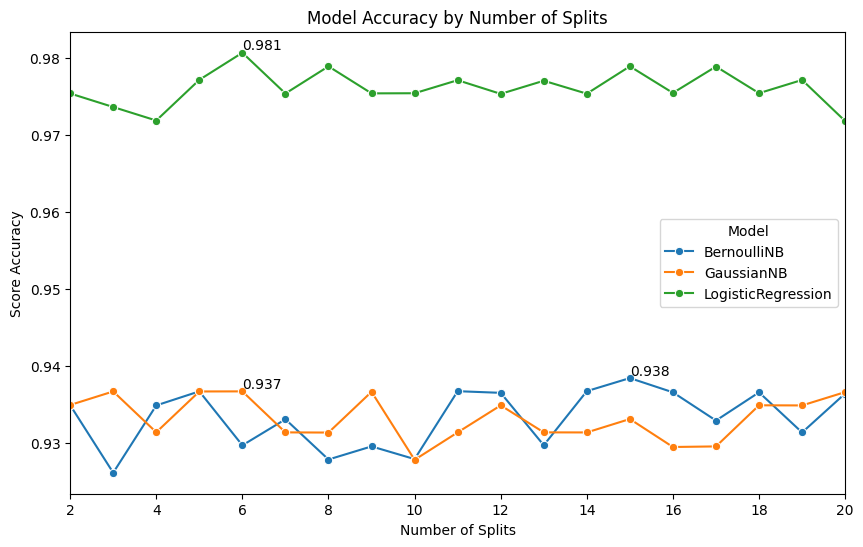

In [6]:
# Reset the index so 'n_split' becomes a regular column
df_pivoted_reset = df_pivoted.reset_index()

# Melt the DataFrame to long format, which Seaborn can use for lineplot
df_long = pd.melt(df_pivoted_reset, id_vars=['n_split'], var_name='model', value_name='score_accuracy')

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x='n_split', y='score_accuracy', hue='model', marker='o')

# Add plot title and labels
plt.title('Model Accuracy by Number of Splits')
plt.xlabel('Number of Splits')
plt.ylabel('Score Accuracy')

# Set the limits for the x-axis
plt.xlim(2, 20)

# Loop through each model to find and annotate the highest score
for model in df_long['model'].unique():
    # Filter the data for the current model
    model_data = df_long[df_long['model'] == model]
    
    # Find the row with the highest score for the current model
    max_score_row = model_data[model_data['score_accuracy'] == model_data['score_accuracy'].max()].iloc[0]
    
    # Annotate the highest score for the model
    plt.text(
        x=max_score_row['n_split'], 
        y=max_score_row['score_accuracy'], 
        s=f"{max_score_row['score_accuracy']:.3f}",  # Format the score to 3 decimal places
        color='black', 
        ha='left',  # Horizontal alignment
        va='bottom'  # Vertical alignment
    )

# Show the plot
plt.legend(title='Model')
plt.show()

### Best Model
LogisticRegression has shown with KFold Cross-Validation that it's able to achieve the highest accuracy score (0.981) compared to GaussianNB (0.937) and BernoulliNB (0.938) respectively.
It's a great model for interpretability and will now be optimized to obtain the best hyperparameters.

In [7]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import FitFailedWarning, ConvergenceWarning

# Suppress Warnings
warnings.filterwarnings('ignore', category=FitFailedWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Define a pipeline that includes scaling and the logistic regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])

# Define the parameter grid for Logistic Regression
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'logreg__penalty': ['l2', 'l1', 'elasticnet', 'none'],
    'logreg__tol': [1e-5, 1e-4, 1e-3, 1e-2],
    'logreg__max_iter': [100, 200, 300, 1000],
    'logreg__class_weight': [None, 'balanced'],
}

# Define the KFold cross-validator
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='accuracy', error_score=np.nan, verbose=1)

# Fit GridSearchCV
grid_search.fit(X, y)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 6 folds for each of 3840 candidates, totalling 23040 fits
Best parameters: {'logreg__C': 1, 'logreg__class_weight': None, 'logreg__max_iter': 200, 'logreg__penalty': 'l2', 'logreg__solver': 'saga', 'logreg__tol': 1e-05}
Best score: 0.984173198954834


/home/fox/Desktop/Model Engineering/iu-breast-cancer-identification/venv/lib/python3.10/site-packages/sklearn/model_selection/_search.py:1051: UserWarning: One or more of the test scores are non-finite: [0.89453154 0.89453154 0.89628593 ...        nan        nan        nan]
  warnings.warn(


In [8]:
# Set up the Logistic Regression model with the best parameters
best_model = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(
        C=1,
        class_weight=None,
        max_iter=200,
        penalty='l2',
        solver='saga',
        tol=0.0001,
        random_state=42
    ))
])

# Fit the model to the entire dataset (or the training set)
# Replace X, y with the features and target variable
best_model.fit(X_train, y_train)

# Evaluate score
best_model.score(X_test,y_test)

0.9824561403508771

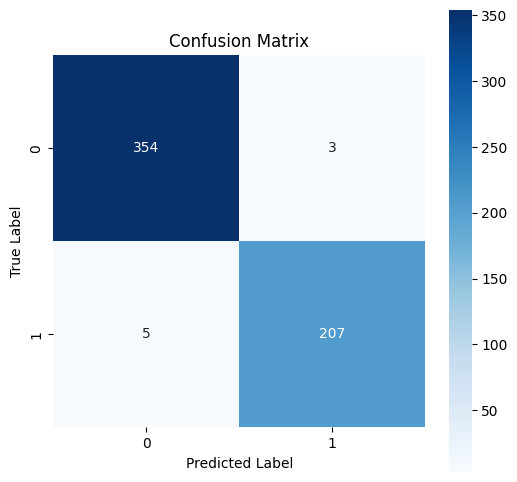

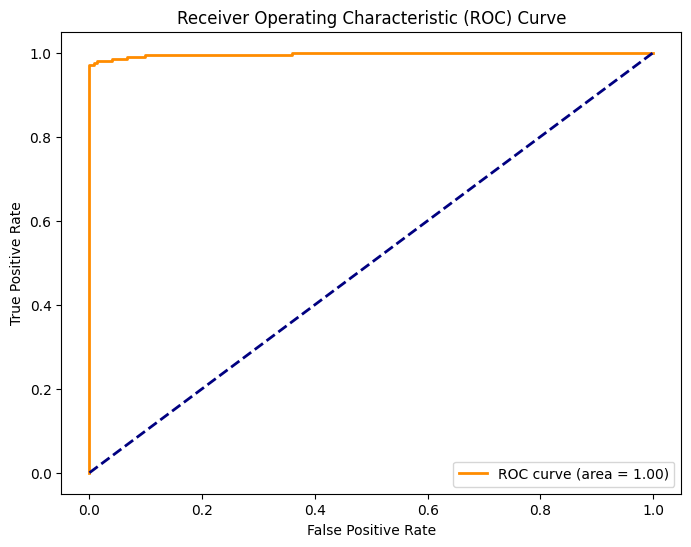

Classification Report:
               precision    recall  f1-score   support

           B       0.99      0.99      0.99       357
           M       0.99      0.98      0.98       212

    accuracy                           0.99       569
   macro avg       0.99      0.98      0.98       569
weighted avg       0.99      0.99      0.99       569



In [9]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

# Make predictions on the test set
y_pred = best_model.predict(X)
y_pred_proba = best_model.predict_proba(X)[:, 1]  # Get probabilities for the positive class

# Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
# Specify 'M' as the positive class
fpr, tpr, thresholds = roc_curve(y, y_pred_proba, pos_label='M')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Classification Report
class_report = classification_report(y, y_pred)
print('Classification Report:\n', class_report)


In [10]:
# Access the logistic regression model from the pipeline
logreg_model = best_model.named_steps['logreg']
scaler = best_model.named_steps['scaler']

# Compute the standard errors of the coefficients (excluding intercept)
X_design = np.hstack([np.ones((X_train.shape[0], 1)), X_train])  # Add intercept to X_train
cov_matrix = np.linalg.inv(X_design.T.dot(X_design)) / len(X_train)
std_errors_features = np.sqrt(np.diag(cov_matrix))[1:]  # Exclude the first element for the intercept

# Compute confidence intervals for the standardized coefficients
ci_lower_std = logreg_model.coef_[0] - 1.96 * std_errors_features
ci_upper_std = logreg_model.coef_[0] + 1.96 * std_errors_features

# Adjust feature coefficients and their confidence intervals for the original scale
coefficients_original_scale = logreg_model.coef_[0] / scaler.scale_
ci_lower_original = ci_lower_std / scaler.scale_
ci_upper_original = ci_upper_std / scaler.scale_

# Adjust the intercept based on the means and standard deviations of the features
intercept_adjusted = logreg_model.intercept_ - np.sum((logreg_model.coef_[0] * scaler.mean_) / scaler.scale_)

# Create a DataFrame for standardized coefficients and their confidence intervals
coeff_df = pd.DataFrame({
    'Feature': ['Intercept'] + list(X_train.columns),
    'Standardized Coefficient': np.hstack([logreg_model.intercept_[0], logreg_model.coef_[0]]),
    'CI Lower (Standardized)': np.hstack([intercept_adjusted - 1.96 * std_errors_features[0], ci_lower_std]),
    'CI Upper (Standardized)': np.hstack([intercept_adjusted + 1.96 * std_errors_features[0], ci_upper_std]),
    'Original Scale Coefficient': np.hstack([intercept_adjusted, coefficients_original_scale]),
    'CI Lower (Original Scale)': np.hstack([intercept_adjusted - 1.96 * std_errors_features[0] / scaler.scale_[0], ci_lower_original]),
    'CI Upper (Original Scale)': np.hstack([intercept_adjusted + 1.96 * std_errors_features[0] / scaler.scale_[0], ci_upper_original])
})

# Display the DataFrame with most important features first (descending)
coeff_df = coeff_df.reindex(coeff_df['Standardized Coefficient'].abs().sort_values(ascending=False).index)
coeff_df


,Feature,Standardized Coefficient,CI Lower (Standardized),CI Upper (Standardized),Original Scale Coefficient,CI Lower (Original Scale),CI Upper (Original Scale)
22,texture_worst,1.239513,1.236429,1.242597,0.204593,0.204084,0.205102
11,radius_se,1.170673,1.036388,1.304959,4.138855,3.664097,4.613614
29,symmetry_worst,1.142480,0.931300,1.353661,18.111094,14.763371,21.458816
8,concave points_mean,0.970180,0.067626,1.872734,25.518727,1.778769,49.258685
27,concavity_worst,0.889854,0.775557,1.004152,4.254260,3.707819,4.800700
21,radius_worst,0.855580,0.830233,0.880927,0.178024,0.172750,0.183298
14,area_se,0.840423,0.839839,0.841007,0.017811,0.017799,0.017824
24,area_worst,0.820558,0.820415,0.820701,0.001447,0.001447,0.001447
28,concave points_worst,0.799054,0.389065,1.209043,12.245239,5.962297,18.528180
7,concavity_mean,0.754304,0.299499,1.209109,9.502385,3.772959,15.231812


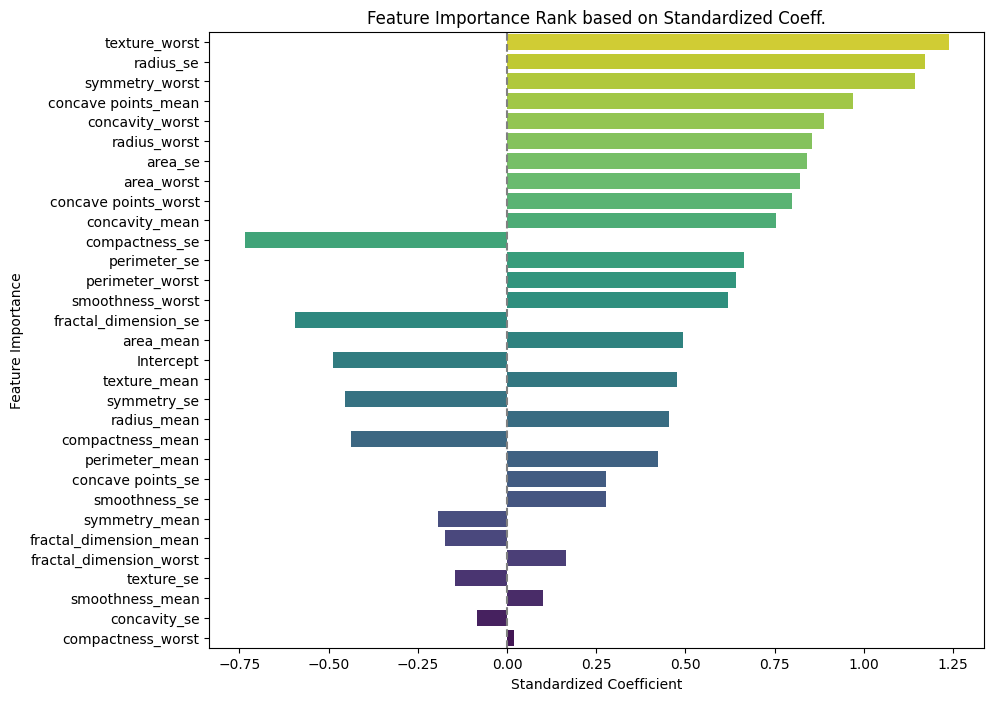

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(data=coeff_df, x='Standardized Coefficient', y='Feature', orient='h', palette='viridis_r', dodge=False, legend=False, hue='Feature')

# Add a line for zero to show positive and negative coefficients
plt.axvline(x=0, color='grey', linestyle='--')

# Add titles and labels
plt.title('Feature Importance Rank based on Standardized Coeff.')
plt.xlabel('Standardized Coefficient')
plt.ylabel('Feature Importance')

# Show the plot
plt.show()


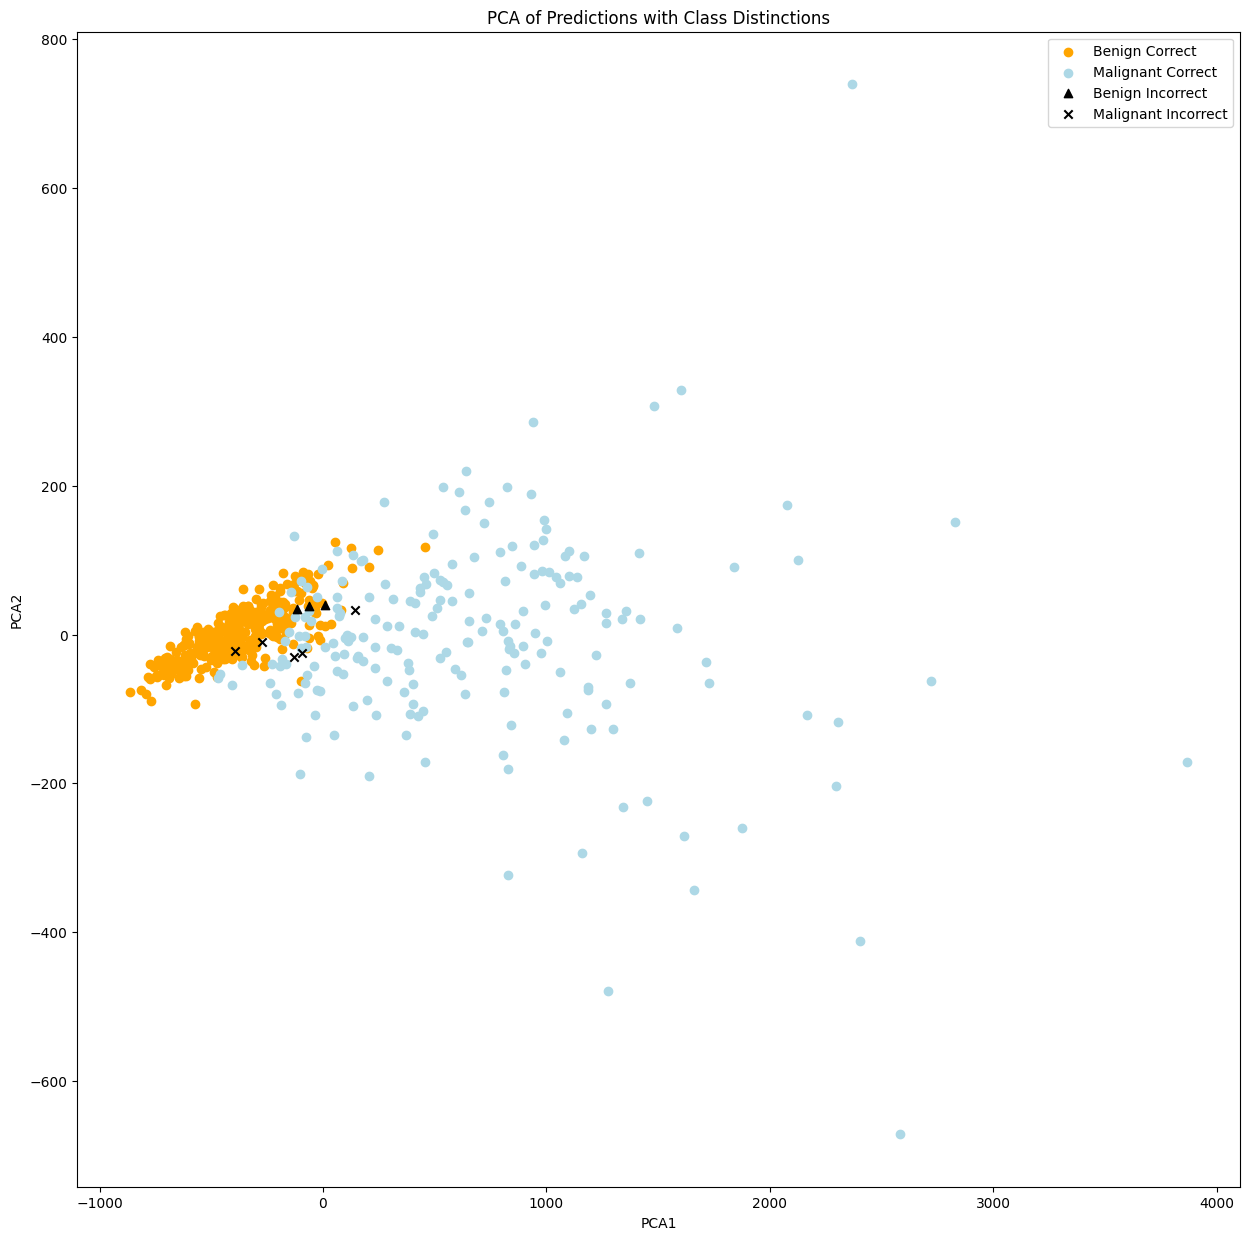

In [15]:
from sklearn.decomposition import PCA

# Assuming 'B' and 'M' are represented as 0 and 1 in the target variable 'y'
# Step 1: Apply PCA to reduce the features to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 2: Make predictions using the trained model
predictions = best_model.predict(X)

# Adjust the conditions to match string representations
benign_indices = (y == 'B')
malignant_indices = (y == 'M')

# Ensure that correct and incorrect predictions are computed based on the actual values
correct_predictions = (predictions == y.values)
incorrect_predictions = ~correct_predictions

# Now, let's adjust the plotting code accordingly
plt.figure(figsize=(15, 15))

# Benign correct (black circle)
plt.scatter(X_pca[benign_indices & correct_predictions, 0], X_pca[benign_indices & correct_predictions, 1], c='orange', marker='o', label='Benign Correct')

# Malignant correct (black triangle)
plt.scatter(X_pca[malignant_indices & correct_predictions, 0], X_pca[malignant_indices & correct_predictions, 1], c='lightblue', marker='o', label='Malignant Correct')

# Benign incorrect (red circle)
plt.scatter(X_pca[benign_indices & incorrect_predictions, 0], X_pca[benign_indices & incorrect_predictions, 1], c='black', marker='^', label='Benign Incorrect')

# Malignant incorrect (red triangle)
plt.scatter(X_pca[malignant_indices & incorrect_predictions, 0], X_pca[malignant_indices & incorrect_predictions, 1], c='black', marker='x', label='Malignant Incorrect')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA of Predictions with Class Distinctions')
plt.legend()
plt.show()
